In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Create a dataset

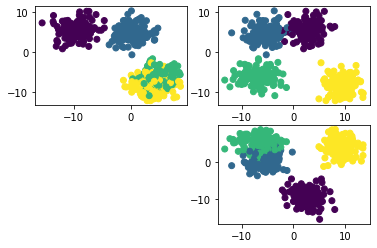

In [ ]:
features, labels = make_blobs(n_samples=500, n_features=3, centers=4, cluster_std=2,random_state=10)
plt.subplot(2,2,1)
plt.scatter(features.T[1,:],features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(features.T[2,:],features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(features.T[2,:],features.T[1,:],c=labels)

# Normilize Data

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
#alternatively you can just use fit transform
#scaled_features = scaler.fit_transform(features)

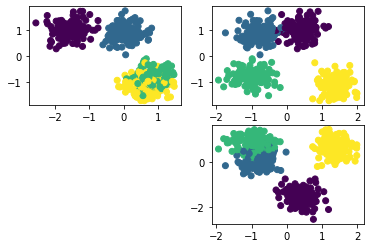

In [ ]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=labels)

# Self Organizing Feature Map

## Installation

This is our first time! Installing a package on our machine.

Read more about this module: https://github.com/JustGlowing/minisom

In [ ]:
!pip install minisom

## Implementation

In [ ]:
from minisom import MiniSom

In [ ]:
model=MiniSom(1,4,3,sigma=0.5, learning_rate=0.3)
model.train(scaled_features,10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.48484539884080624


In [ ]:
model._weights

array([[[-1.16708662,  0.64653316,  1.35273388],
        [-0.81930111,  0.79298358, -0.9144635 ],
        [ 0.98930807,  0.02026873, -0.82331083],
        [ 0.95977668, -1.67628377,  0.36681952]]])

In [ ]:
result=model.activation_response(scaled_features)
print ("Active Perceptrons are:\n",result)

Active Perceptrons are:
 [[125. 125. 125. 125.]]


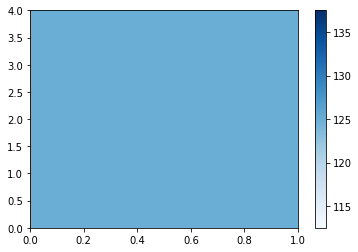

In [ ]:
plt.pcolor(result.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [ ]:
SOM_Cluster=[]
for record in scaled_features:
  SOM_Cluster.append(model.winner(record))

In [ ]:
SOM_Cluster_index=[coordiate[0]*4+coordiate[1] for coordiate in SOM_Cluster]

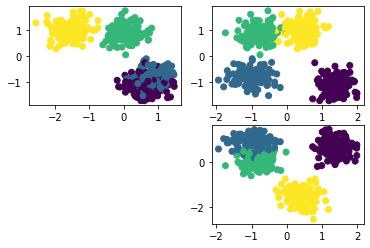

In [ ]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=SOM_Cluster_index)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=SOM_Cluster_index)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=SOM_Cluster_index)

# Image Color Quantization



In [ ]:
img=plt.imread('Puppy.jpg')

In [ ]:
type(img)

numpy.ndarray

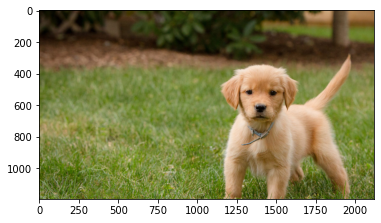

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(1193, 2121, 3)

In [ ]:
data=img.reshape(img.shape[0]*img.shape[1],3)

In [ ]:
data.shape

(2530353, 3)

In [ ]:
data[0,:]

array([12, 12,  2], dtype=uint8)

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(data)
scaled_data = scaler2.transform(data)

In [ ]:
scaled_data[0,:]

array([-2.11726704, -2.22809094, -1.45034927])

In [ ]:
Color_Model = MiniSom(4, 4, 3, sigma=0.1, learning_rate=0.2)
Color_Model.train(scaled_data, 10000,verbose=True,)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7353861834106092


In [ ]:
scaled_data_qnt=Color_Model.quantization(scaled_data)

In [ ]:
scaled_data_qnt.shape

(2530353, 3)

In [ ]:
scaled_data_qnt[0,:]

array([-2.18008475, -2.14397819, -1.41781479])

In [ ]:
data_qnt=scaler2.inverse_transform(scaled_data_qnt)

In [ ]:
img_qnt=data_qnt.reshape(img.shape[0],img.shape[1],3)

In [ ]:
img_qnt.shape

(1193, 2121, 3)

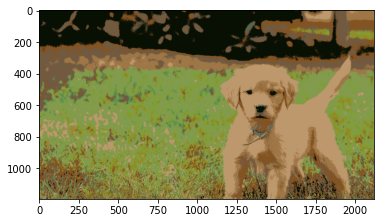

In [ ]:
plt.imshow(img_qnt.astype(int))